In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV, KFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/User/Downloads/train.csv')

In [3]:
df.head(15)

,Unnamed: 0,n_visits,n_actions,unique_actions,products_tried,products_added,unique_products_category_tried,unique_products_category_added,saved_to_cart,comments_writen,counts_of_buys,came_back
0,255863,1,63,45,0,0,0,2,1,1,2,0
1,583906,4,350,72,0,0,0,2,1,4,6,0
2,280626,12,1019,123,5,2,6,6,1,9,14,0
3,357109,1,503,124,0,0,30,16,0,0,0,0
4,264311,15,1869,139,0,0,34,13,1,12,25,1
5,189517,12,551,89,5,3,5,7,1,8,8,1
6,174690,23,2863,139,81,16,85,30,1,5,12,1
7,388465,2,293,70,56,2,57,5,0,0,0,0
8,393808,6,3723,55,0,0,0,0,0,0,0,1
9,248383,2,469,67,2,1,2,3,1,1,2,0


### Data Description

* **n_visits** - number of visits of the website during the first 3 days.
* **n_actions** - number of actions/button clicks in the website during the first 3 days.
* **unique_actions** - number of unique actions in the website during the first 3 days.
* **products_tried** - number of products viewed during the first 3 days.
* **products_added** - number of products added to cart during the first 3 days.
* **unique_products_category_tried** - number of unique products’ categories viewed during the first 3 days.
* **unique_products_category_added** - number of unique products’ categories added to cart during the first 3 days.
* **saved_to_cart** - if the user actually saved the purchases for later purchase during the first 3 days.
* **comments_writen** - how many unique comments the user did during the first 3 days.
* **counts_of_buys** - how many times the user actually paid during the first 3 days.


In [4]:
df.describe()

,Unnamed: 0,n_visits,n_actions,unique_actions,products_tried,products_added,unique_products_category_tried,unique_products_category_added,saved_to_cart,comments_writen,counts_of_buys,came_back
count,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000,658052.000000
mean,469962.923185,8.477398,537.548177,65.913323,5.937011,1.210488,10.309620,4.595120,0.529280,3.532087,5.349092,0.320338
std,271396.332262,30.431194,964.670595,34.721370,16.296478,2.660344,21.909215,5.656423,0.499142,9.826804,13.434137,0.466607
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,235061.750000,1.000000,90.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,469900.500000,3.000000,236.000000,62.000000,1.000000,0.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000
75%,705102.250000,8.000000,594.000000,87.000000,4.000000,1.000000,10.000000,7.000000,1.000000,3.000000,6.000000,1.000000
max,940074.000000,5996.000000,75408.000000,347.000000,596.000000,73.000000,597.000000,118.000000,1.000000,1212.000000,1591.000000,1.000000


In [5]:
df.shape

(658052, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658052 entries, 0 to 658051
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   Unnamed: 0                      658052 non-null  int64
 1   n_visits                        658052 non-null  int64
 2   n_actions                       658052 non-null  int64
 3   unique_actions                  658052 non-null  int64
 4   products_tried                  658052 non-null  int64
 5   products_added                  658052 non-null  int64
 6   unique_products_category_tried  658052 non-null  int64
 7   unique_products_category_added  658052 non-null  int64
 8   saved_to_cart                   658052 non-null  int64
 9   comments_writen                 658052 non-null  int64
 10  counts_of_buys                  658052 non-null  int64
 11  came_back                       658052 non-null  int64
dtypes: int64(12)
memory usage: 60.2 MB


In [7]:
#df['came_back'] = df['came_back'].astype('O')
df['saved_to_cart'] = df['saved_to_cart'].astype('O')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658052 entries, 0 to 658051
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unnamed: 0                      658052 non-null  int64 
 1   n_visits                        658052 non-null  int64 
 2   n_actions                       658052 non-null  int64 
 3   unique_actions                  658052 non-null  int64 
 4   products_tried                  658052 non-null  int64 
 5   products_added                  658052 non-null  int64 
 6   unique_products_category_tried  658052 non-null  int64 
 7   unique_products_category_added  658052 non-null  int64 
 8   saved_to_cart                   658052 non-null  object
 9   comments_writen                 658052 non-null  int64 
 10  counts_of_buys                  658052 non-null  int64 
 11  came_back                       658052 non-null  int64 
dtypes: int64(11), object(1)
memory

## Data Cleaning

In [9]:
df = df.drop(['Unnamed: 0'],  axis=1)

### Checking NA values

In [10]:
df_nas = pd.DataFrame(df.isna().sum(), columns=['Number of NAs'])
df_nas['Percentage of NAs'] = round(df_nas['Number of NAs'] / df.shape[0] *100, 3)
df_nas

,Number of NAs,Percentage of NAs
n_visits,0,0.0
n_actions,0,0.0
unique_actions,0,0.0
products_tried,0,0.0
products_added,0,0.0
unique_products_category_tried,0,0.0
unique_products_category_added,0,0.0
saved_to_cart,0,0.0
comments_writen,0,0.0
counts_of_buys,0,0.0


### Checking for duplicates

In [11]:
df.duplicated().sum()

114169

In [12]:
print(round(114169/658052*100), "% of our data is duplicated")

17 % of our data is duplicated


In [13]:
#droping duplicates
df = df.drop_duplicates()

### Checking for negative values 

In [14]:
df[df<0].sum()

n_visits                          0.0
n_actions                         0.0
unique_actions                    0.0
products_tried                    0.0
products_added                    0.0
unique_products_category_tried    0.0
unique_products_category_added    0.0
saved_to_cart                     0.0
comments_writen                   0.0
counts_of_buys                    0.0
came_back                         0.0
dtype: float64

## Data visualisation

<AxesSubplot:xlabel='came_back', ylabel='count'>

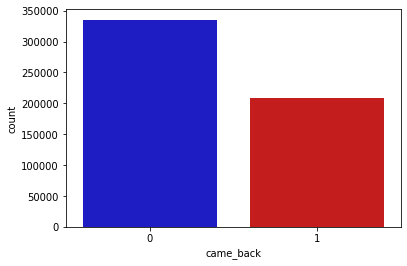

In [15]:
colors = ["#0101DF", "#DF0101"]
sns.countplot('came_back', data=df, palette=colors)

<AxesSubplot:>

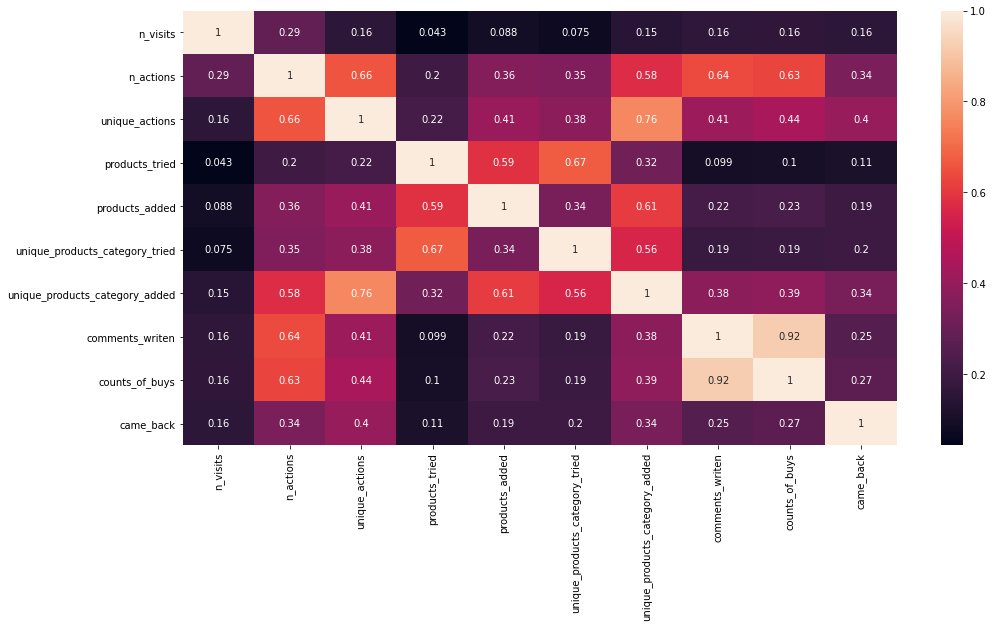

In [16]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

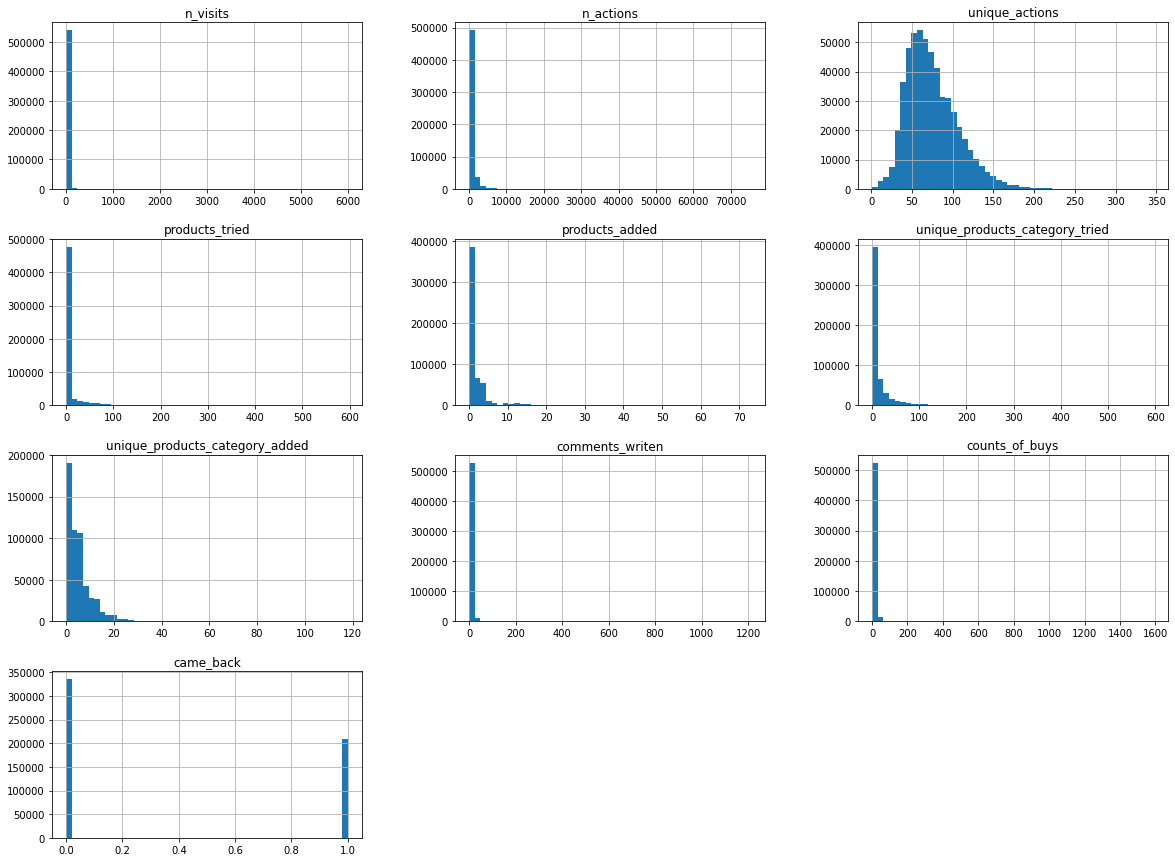

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show()

[Text(1, 0, 'n_visits'),
 Text(2, 0, 'n_actions'),
 Text(3, 0, 'unique_actions'),
 Text(4, 0, 'products_tried'),
 Text(5, 0, 'products_added'),
 Text(6, 0, 'unique_products_category_tried'),
 Text(7, 0, 'unique_products_category_added'),
 Text(8, 0, 'comments_writen'),
 Text(9, 0, 'counts_of_buys'),
 Text(10, 0, 'came_back')]

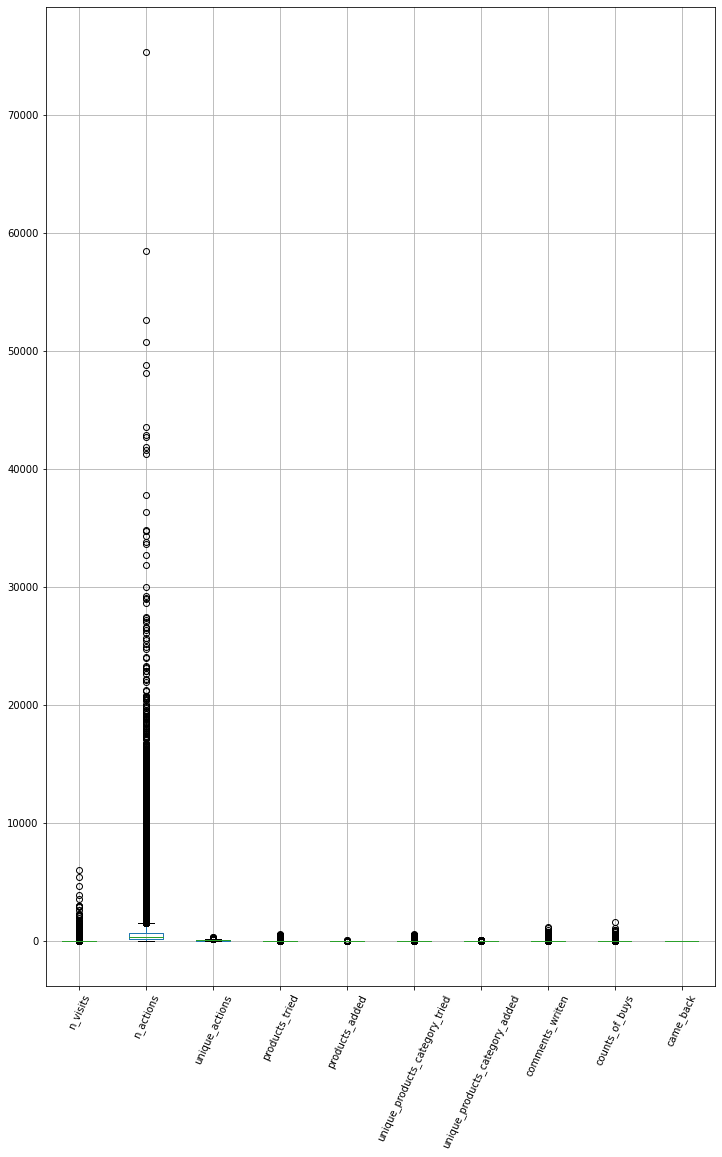

In [18]:
ax = df.boxplot(figsize=(12, 18))
ax.set_xticklabels(ax.get_xticklabels(), rotation=65)

## Outlier detection and handling

In [19]:
df.n_visits.describe()

count    543883.000000
mean          9.977879
std          33.276358
min           1.000000
25%           2.000000
50%           4.000000
75%          10.000000
max        5996.000000
Name: n_visits, dtype: float64

In [20]:
df.n_actions.describe()

count    543883.000000
mean        641.330674
std        1031.309524
min           1.000000
25%         152.000000
50%         320.000000
75%         718.000000
max       75408.000000
Name: n_actions, dtype: float64

In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

n_visits                            8.0
n_actions                         566.0
unique_actions                     41.0
products_tried                      5.0
products_added                      2.0
unique_products_category_tried     12.0
unique_products_category_added      6.0
comments_writen                     4.0
counts_of_buys                      7.0
came_back                           1.0
dtype: float64


In [22]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(385094, 11)

In [23]:
df.describe()

,n_visits,n_actions,unique_actions,products_tried,products_added,unique_products_category_tried,unique_products_category_added,comments_writen,counts_of_buys,came_back
count,385094.000000,385094.000000,385094.000000,385094.000000,385094.000000,385094.000000,385094.000000,385094.000000,385094.000000,385094.000000
mean,4.701252,323.692441,65.087534,2.081959,0.821114,4.394117,3.760557,1.648159,2.691143,0.289290
std,4.068110,284.530824,23.589515,2.673943,1.148775,5.844875,3.350249,2.205489,3.437892,0.453434
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,122.000000,48.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,227.000000,62.000000,1.000000,0.000000,2.000000,3.000000,1.000000,2.000000,0.000000
75%,6.000000,428.000000,80.000000,3.000000,1.000000,6.000000,6.000000,2.000000,4.000000,1.000000
max,22.000000,1567.000000,154.000000,12.000000,5.000000,31.000000,17.000000,10.000000,17.000000,1.000000


[Text(1, 0, 'n_visits'),
 Text(2, 0, 'n_actions'),
 Text(3, 0, 'unique_actions'),
 Text(4, 0, 'products_tried'),
 Text(5, 0, 'products_added'),
 Text(6, 0, 'unique_products_category_tried'),
 Text(7, 0, 'unique_products_category_added'),
 Text(8, 0, 'comments_writen'),
 Text(9, 0, 'counts_of_buys'),
 Text(10, 0, 'came_back')]

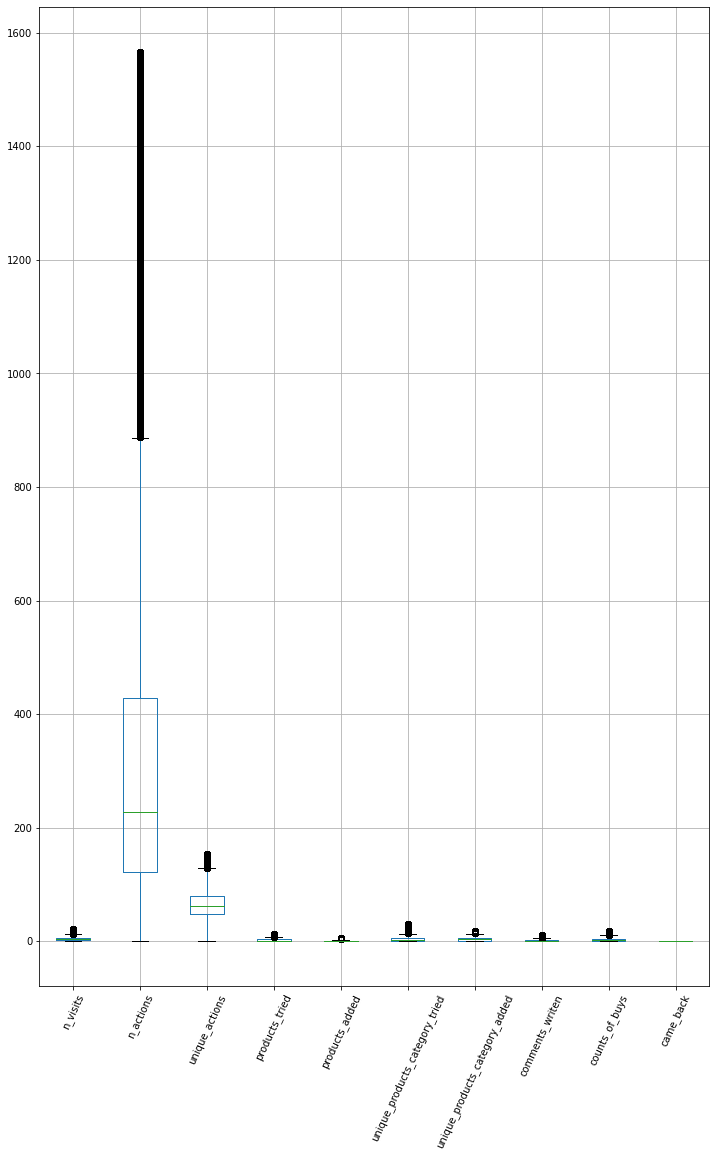

In [24]:
ax = df.boxplot(figsize=(12, 18))
ax.set_xticklabels(ax.get_xticklabels(), rotation=65)

## Feature engineering

In [25]:
df['rel_actions'] = df['unique_actions'] / df['n_actions']
df['visits_buyings'] = df['counts_of_buys'] / df['n_visits']

In [26]:
y = df.came_back
x = df.drop(["came_back"], axis = 1)
columns = x.columns.tolist()
columns

['n_visits',
 'n_actions',
 'unique_actions',
 'products_tried',
 'products_added',
 'unique_products_category_tried',
 'unique_products_category_added',
 'saved_to_cart',
 'comments_writen',
 'counts_of_buys',
 'rel_actions',
 'visits_buyings']

### train-test

In [27]:
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 42)

In [28]:
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

## Decision tree

### Gini

In [30]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)


In [31]:
# fit the model
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [32]:
clf_gini.feature_importances_

array([8.72838483e-01, 6.12171417e-02, 9.54538289e-03, 1.23074375e-03,
       0.00000000e+00, 4.34744959e-03, 2.15198072e-03, 4.86508072e-04,
       3.05395244e-02, 2.47960699e-03, 1.48201892e-02, 3.42990139e-04])

In [33]:
y_pred_gini = clf_gini.predict(X_test)

In [34]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7587


In [35]:
# check for overfitting

y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [36]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7623


In [37]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, Y_test)))

Training set score: 0.7623
Test set score: 0.7587


### Entropy

In [38]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
# fit the model
clf_en.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [39]:
y_pred_en = clf_en.predict(X_test)

In [40]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7579


In [41]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_en)))

Training-set accuracy score: 0.7609


In [42]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, Y_test)))

Training set score: 0.7609
Test set score: 0.7579


In [43]:
cm = confusion_matrix(Y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[71686 10392]
 [17580 15871]]


In [44]:
print(classification_report(Y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84     82078
           1       0.60      0.47      0.53     33451

    accuracy                           0.76    115529
   macro avg       0.70      0.67      0.68    115529
weighted avg       0.75      0.76      0.75    115529



## KNN

In [45]:
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, Y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test)

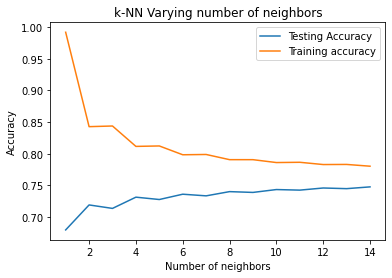

In [46]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [63]:
knn = KNeighborsClassifier(n_neighbors=14)

In [64]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=14)

In [65]:
knn.score(X_test,Y_test)

0.7475698742307126

In [66]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(Y_test,y_pred)

array([[73688,  8390],
       [20773, 12678]], dtype=int64)

In this project, I build a Decision-Tree Classifier model to predict the churn of potential customer. I build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases.

 With KNN classifier results are worse. So for this data DT algorithm is a good choice.